# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,6)

In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.model_selection import ValidationCurve

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Import and explore the data. Clean the data for outliers and missing values. 

In [6]:
# Your code here
data = pd.read_csv('../data/boston_data.csv')

In [7]:
data.shape

(404, 14)

In [10]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [8]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [9]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [18]:
# crim
# per capita crime rate by town.

# zn
# proportion of residential land zoned for lots over 25,000 sq.ft.

# indus
# proportion of non-retail business acres per town.

# chas
# Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

# nox
# nitrogen oxides concentration (parts per 10 million).

# rm
# average number of rooms per dwelling.

# age
# proportion of owner-occupied units built prior to 1940.

# dis
# weighted mean of distances to five Boston employment centres.

# rad
# index of accessibility to radial highways.

# tax
# full-value property-tax rate per $10,000.

# ptratio
# pupil-teacher ratio by town.

# black
# 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

# lstat
# lower status of the population (percent).

# medv
# median value of owner-occupied homes in $1000s.

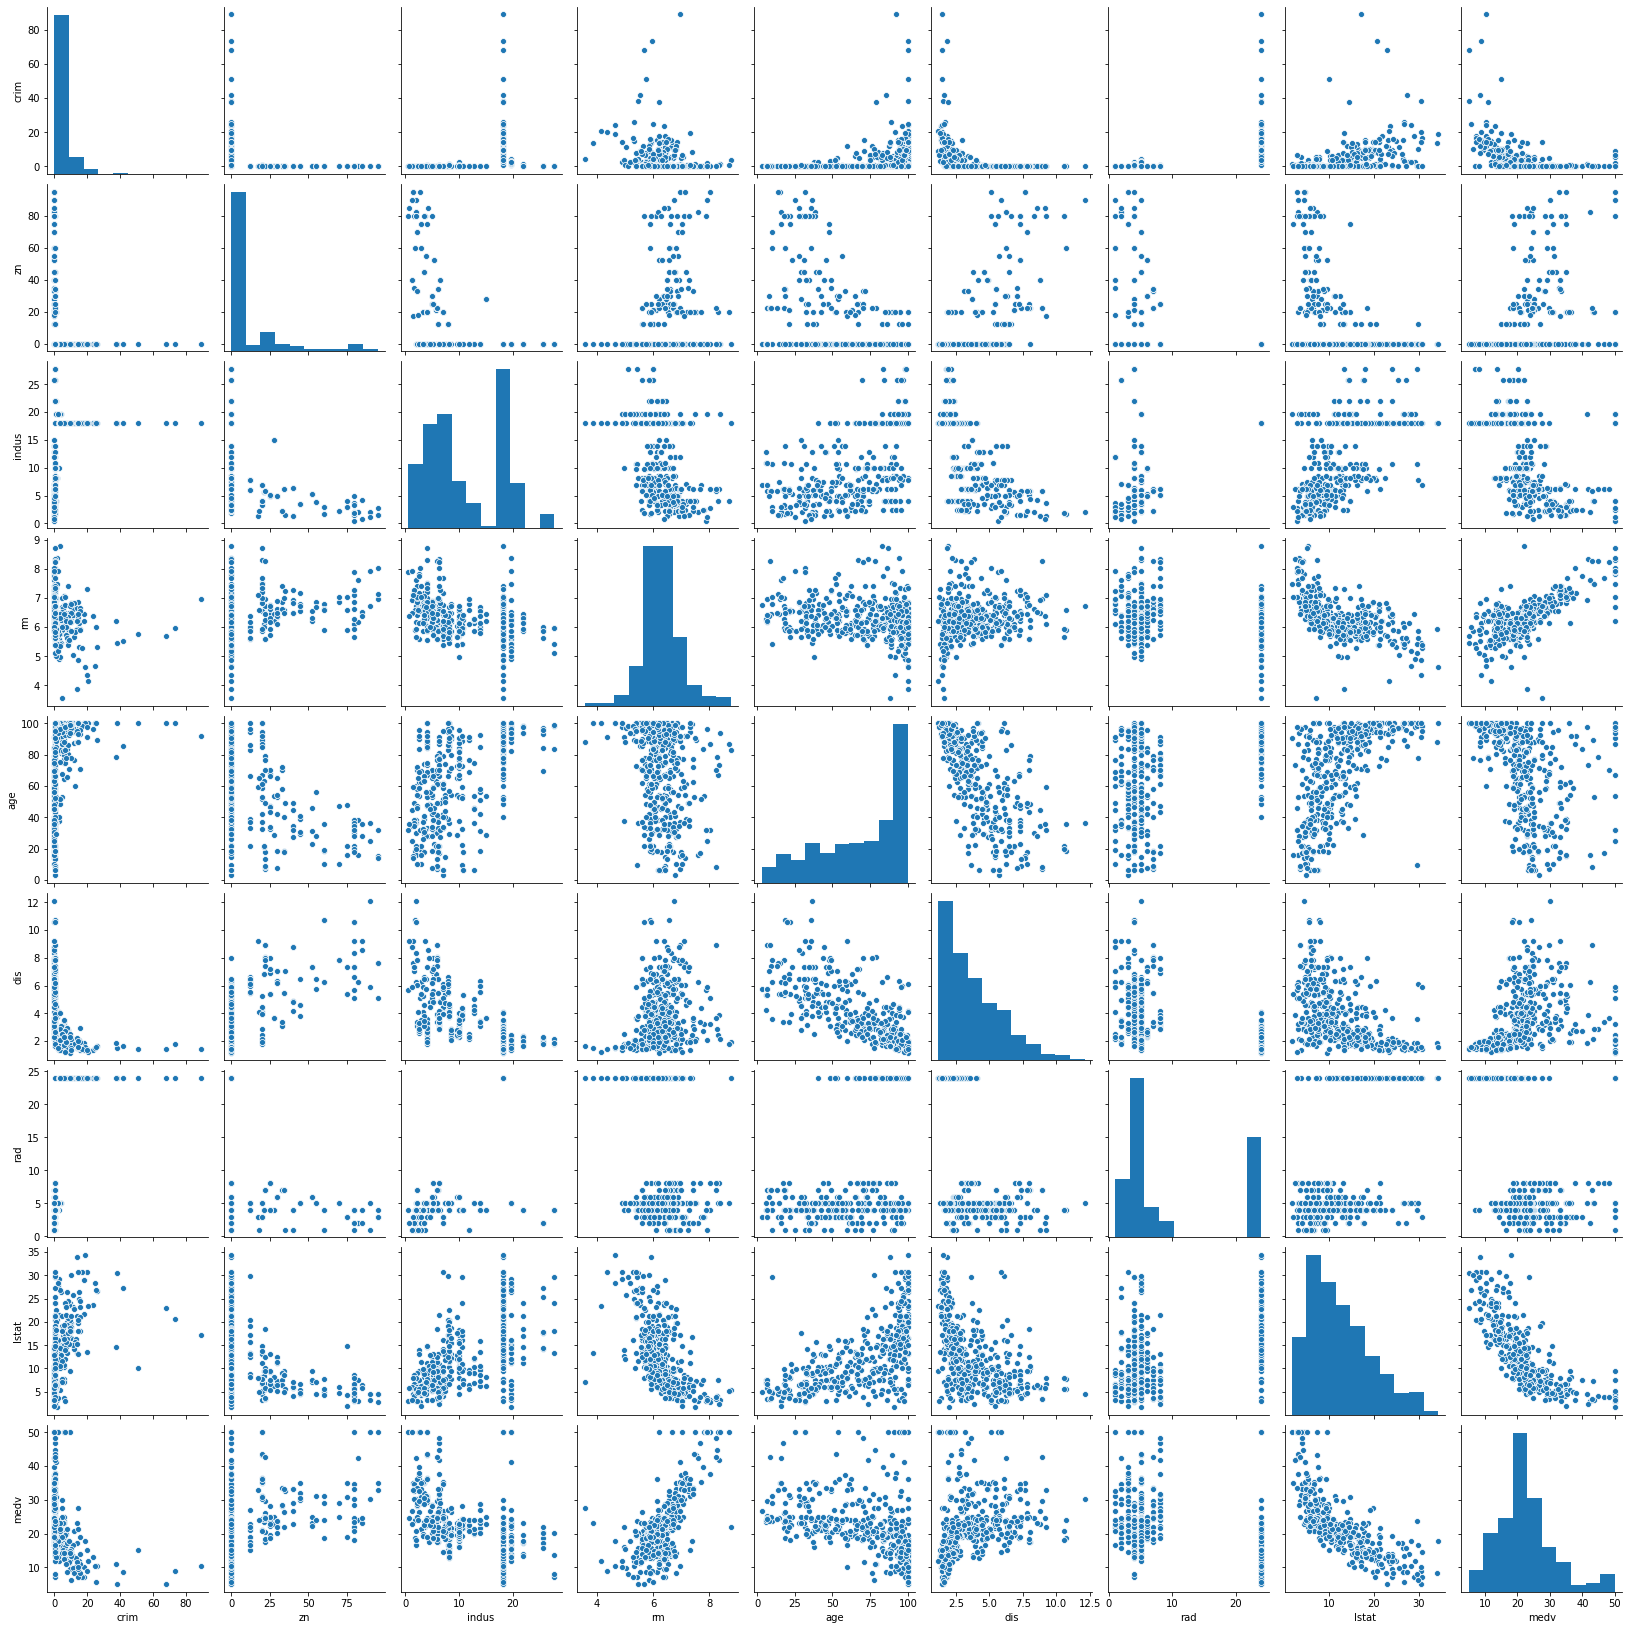

In [19]:
# Your plots here
columns = ['crim', 'zn', 'indus','rm', 'age', 'dis', 'rad', 'lstat', 'medv']
sns.pairplot(data = data[columns])

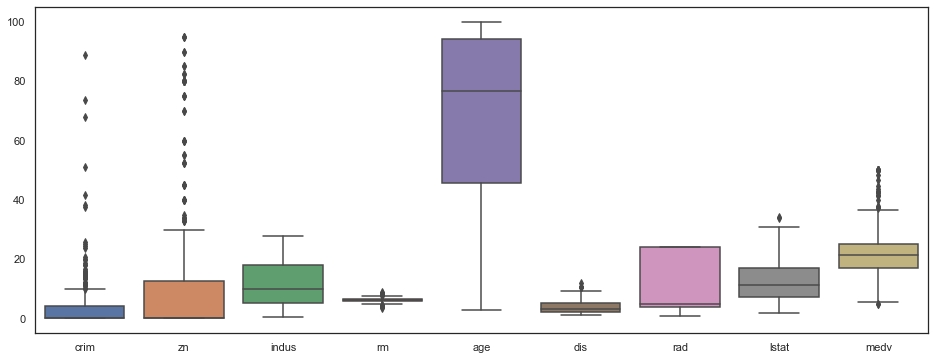

In [34]:
sns.boxplot(data = data[columns])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [22]:
# RM (average number of rooms per dwelling) and MEDV (median value of owner-occupied homes in $1000s) 
# are positvely correlated - meaning THE MORE ROOMS,THE MORE EXPENSIVE a home in Boston is

# LSTAT (lower status of the population (percent)) MEDV (median value of owner-occupied homes in $1000s) 
# are negatively correlated - meaning THE LOWER STATUS OF THE POPULATION, the CHEAPER a home in Boston is

# The remaning variables don't have clear relationships or are not as easily identifiable

### Outliers

In [23]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=.1)

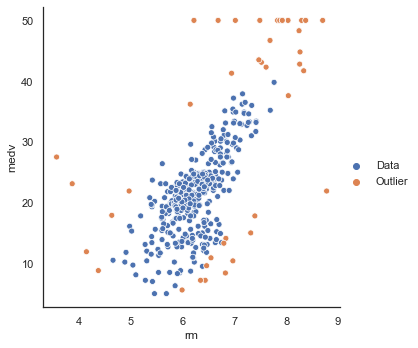

In [35]:
# RM and MEDV 
env_pred = clf.fit_predict(data[['rm','medv']])
sns.relplot(x='rm', y='medv', hue=np.where(env_pred<0,'Outlier','Data'), data=data)

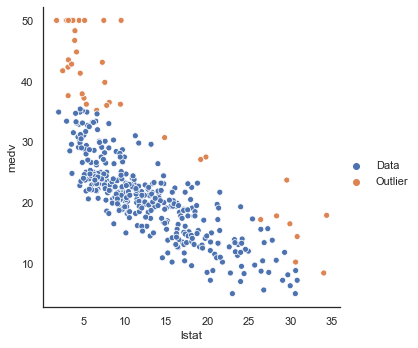

In [36]:
# LSTAT and MEDV 
env_pred_2 = clf.fit_predict(data[['lstat','medv']])
sns.relplot(x='lstat', y='medv', hue=np.where(env_pred_2<0,'Outlier','Data'), data=data)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

(14.5, -0.5)

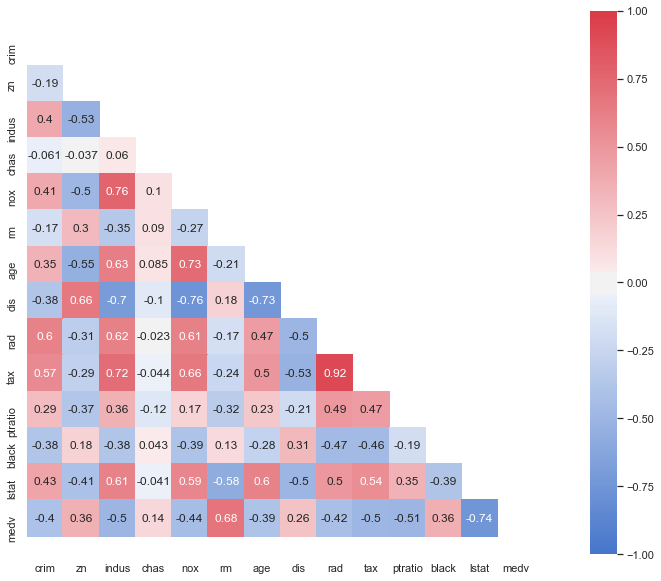

In [37]:
# Your response here

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(20,10))

# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors

# Plot the heatmap
sns.heatmap(data.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [39]:
# Your code here
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [42]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # Your code here:
    r2_score(y_true, y_pred)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [43]:
# Your code here
X = data.drop(columns=['medv'])
y = data['medv']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(323, 13)
(323,)
(81, 13)
(81,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [49]:
# Five separate RFR here with the given max depths

rfr2 = RandomForestRegressor(n_estimators = 100, oob_score = True, bootstrap = True, max_depth = 2)
rfr4 = RandomForestRegressor(n_estimators = 100, oob_score = True, bootstrap = True, max_depth = 4)
rfr6 = RandomForestRegressor(n_estimators = 100, oob_score = True, bootstrap = True, max_depth = 6)
rfr8 = RandomForestRegressor(n_estimators = 100, oob_score = True, bootstrap = True, max_depth = 8)
rfr10 = RandomForestRegressor(n_estimators = 100, oob_score = True, bootstrap = True, max_depth = 10)

Now, plot the score for each tree on the training set and on the testing set.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


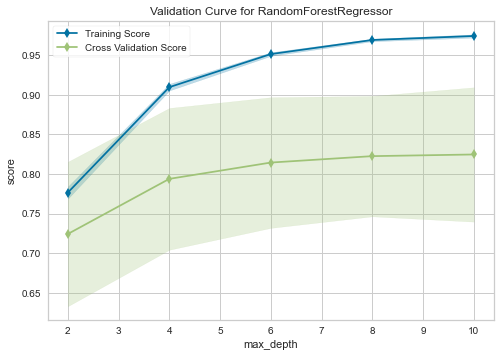

In [52]:
# Produce a plot with the score for the testing and training for the different max depths

viz = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(2, 12, 2), cv=10, scoring="r2"
)

viz.fit(X, y)
viz.show()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [54]:
# Your response here

# The ideal depth of trees seems to be 4 for the given dataset as it's the one whose scores (tranining and CV)
# are closest without comprimising an overfitting situation 

# From a depth of 5 and onwards it seems there is overfitting

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [56]:
# Your response here

# The bias-variance tradeoff depends on the depth of the tree.

# Depth of 1: High Bias
# Both training and testing scores are low.
# There is barely a gap between the training and testing scores.
# This indicates the model is not fitting the dataset well and not generalizing well 
# hence the model is suffering from high bias.

# Depth of 10: High Variance
# Training score is high. Testing score is low
# There is a substantial gap between the training and testing scores.
# This indicates the model is fitting the dataset well but not generalizing well 
# hence the model is suffering from high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [57]:
# Your response here

# The depth of 4.
# The training score seems to indicate the highest possible score for the model's ability 
# to generalize to unseen data.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [58]:
# Your response here

# Data from 40 years ago may not be of much interest given how much things have changed since then 
# The model is not robust enough given the features that charactherise the predicted price of a home 